## Tarea 4 : Transformaciónes

-Instrucciones-

Con base en el material entregado en la tarea 3 y lo visto en clase (17/sep/2025):

1.- Obtener las fórmulas para calcular los valores de las muestras de las siguientes transformaciones 

    1.- normalización (para valores entre 0 y 1)

    2.- estandarización (con media en 0 y desviación estándar en 1)

    3.- primera diferenciación

2.- Generar las fórmulas para calcular los valores de las muestras de las siguientes transformaciones

    1.- normalización (para valores entre -1 y +1)

    2.- segunda diferenciación

    3.- tercera diferenciación

3.- Generar las series de tiempo correspondientes a las transformaciones del punto 2 (normalización entre -1 y +1, segunda y tercera diferenciación).

4.- Graficar la serie original y las diferentes transformaciones.

5.- Analizar los resultados y reportar dicho análisis.



In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path_13 = 'data/battery_13_500.csv'
df_13 = pd.read_csv(path_13)
# Voy a necesitar solamente los registros de temperatura
df_temp = df_13.copy()
df_temp['obs'] = range(1, len(df_temp)+1)
df_temp = df_temp[['obs','time', 'temperature_battery']]
df_temp = df_temp.rename(columns={'temperature_battery' : 'T_b'})
df_temp.head()

,obs,time,T_b
0,1,1746819.055,22.668
1,2,1746820.073,22.668
2,3,1746821.115,22.668
3,4,1746822.133,22.668
4,5,1746823.150,22.664


<Axes: xlabel='obs'>

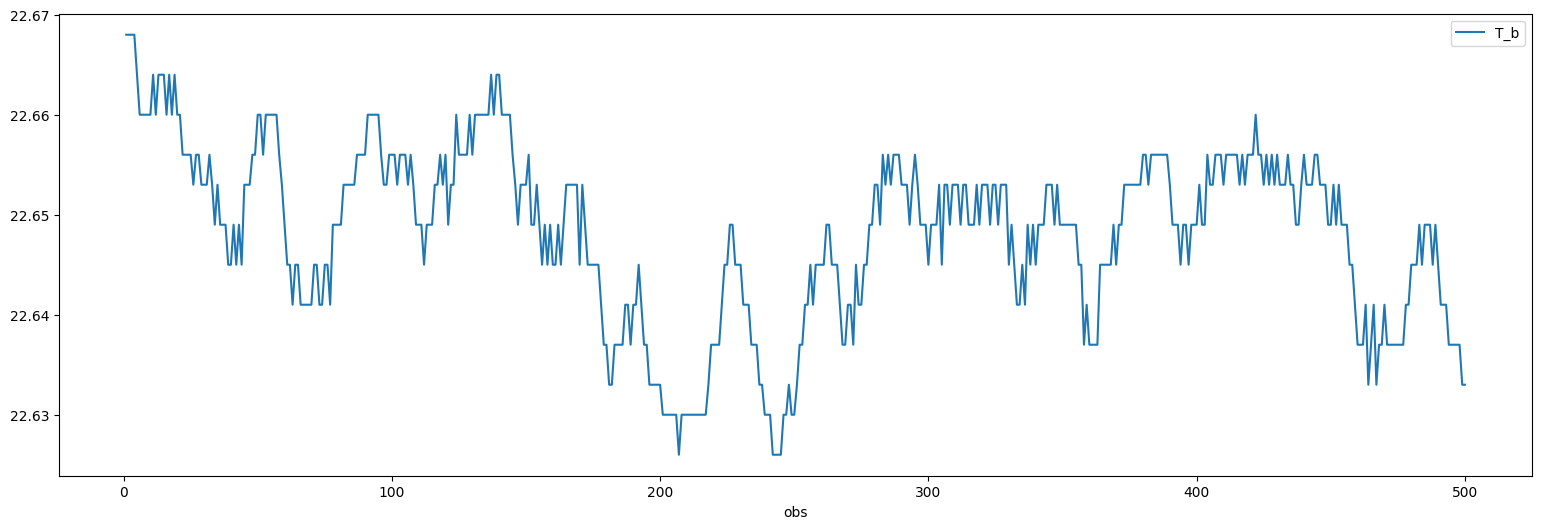

In [27]:
df_temp.plot(
    x = 'obs',
    y = 'T_b',
    figsize=(19, 6)
)
# Esta es la serie de tiempo con la que se van a trabajar las transformaciónes.

## Parte 1.1 Normalización de valores entre [0,1]

Para una normalización se necesita de la siguiente operación:

$$
x_\text{norm} = \frac{x - \min(x)}{\max(x) - \min(x)}
$$

In [28]:
df_temp_norm = df_temp.copy()
df_temp_norm['T_b_norm'] = (df_temp_norm['T_b'] - df_temp_norm['T_b'].min())/(df_temp_norm['T_b'].max() - df_temp_norm['T_b'].min())
df_temp_norm.head()

,obs,time,T_b,T_b_norm
0,1,1746819.055,22.668,1.000000
1,2,1746820.073,22.668,1.000000
2,3,1746821.115,22.668,1.000000
3,4,1746822.133,22.668,1.000000
4,5,1746823.150,22.664,0.904762


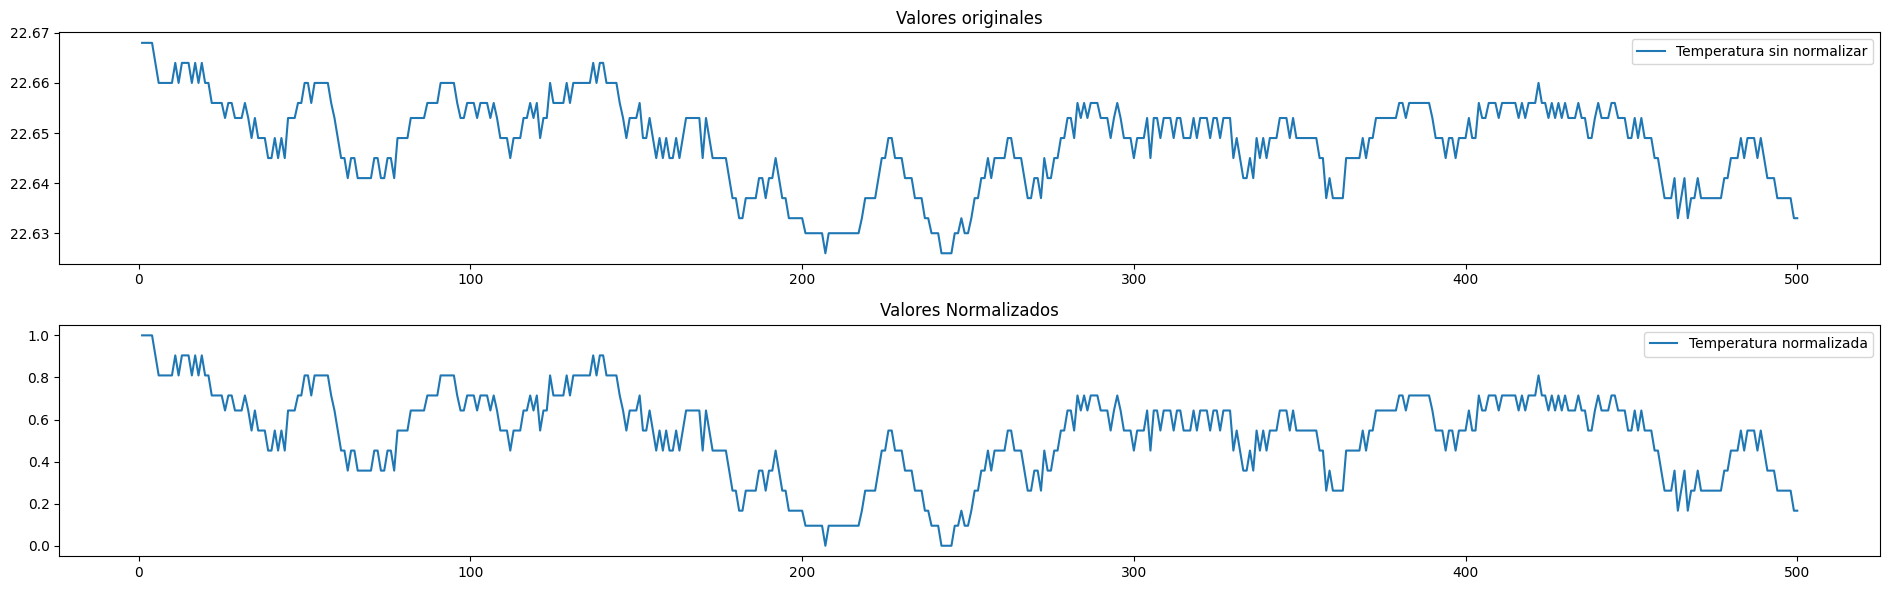

In [29]:
X = df_temp_norm['obs']
Y1 = df_temp_norm['T_b']
Y2 = df_temp_norm['T_b_norm']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (19, 6))
ax1.plot(X, Y1, label = 'Temperatura sin normalizar')
ax1.set_title('Valores originales')
ax1.legend()

ax2.plot(X, Y2, label = 'Temperatura normalizada')
ax2.set_title('Valores Normalizados')
ax2.legend()

plt.tight_layout()
plt.show()

## Parte 1.2 Estandarización de valores con media = 0 y std = 1

Necesitamos aplicar la siguiente operación:

```math
z = \frac{x - \mu}{\sigma}
```

In [30]:
df_temp_std = df_temp.copy()
df_temp_std['T_b_std'] = (df_temp_std['T_b'] - df_temp_std['T_b'].mean())/(df_temp_std['T_b'].std())
df_temp_std.head()

,obs,time,T_b,T_b_std
0,1,1746819.055,22.668,2.285151
1,2,1746820.073,22.668,2.285151
2,3,1746821.115,22.668,2.285151
3,4,1746822.133,22.668,2.285151
4,5,1746823.150,22.664,1.824575


In [33]:
df_temp_std['T_b_std'].describe()

count    5.000000e+02
mean     1.652580e-13
std      1.000000e+00
min     -2.550904e+00
25%     -8.237414e-01
50%      9.741197e-02
75%      5.579886e-01
max      2.285151e+00
Name: T_b_std, dtype: float64

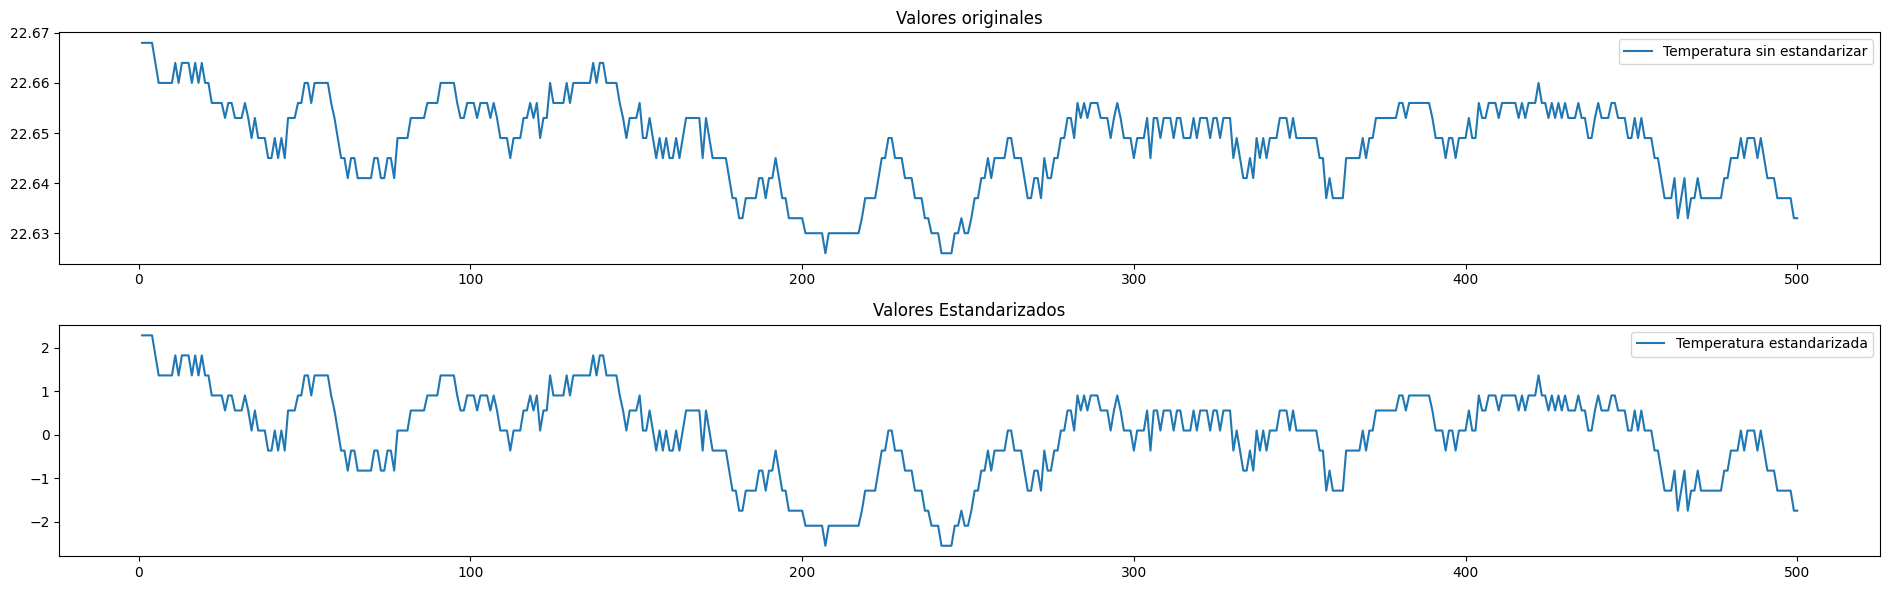

In [31]:
X = df_temp_std['obs']
Y1 = df_temp_std['T_b']
Y2 = df_temp_std['T_b_std']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (19, 6))
ax1.plot(X, Y1, label = 'Temperatura sin estandarizar')
ax1.set_title('Valores originales')
ax1.legend()

ax2.plot(X, Y2, label = 'Temperatura estandarizada')
ax2.set_title('Valores Estandarizados')
ax2.legend()

plt.tight_layout()
plt.show()

## Parte 1.3 Primera diferenciación

La diferenciación se puede calcular asi:

```math
\Delta x_t = x_t - x_{t-1}
```

In [34]:
df_temp_diff = df_temp.copy()
df_temp_diff['1diff'] = df_temp_diff['T_b'].diff()
df_temp_diff.head()

,obs,time,T_b,1diff
0,1,1746819.055,22.668,NaN
1,2,1746820.073,22.668,0.000
2,3,1746821.115,22.668,0.000
3,4,1746822.133,22.668,0.000
4,5,1746823.150,22.664,-0.004


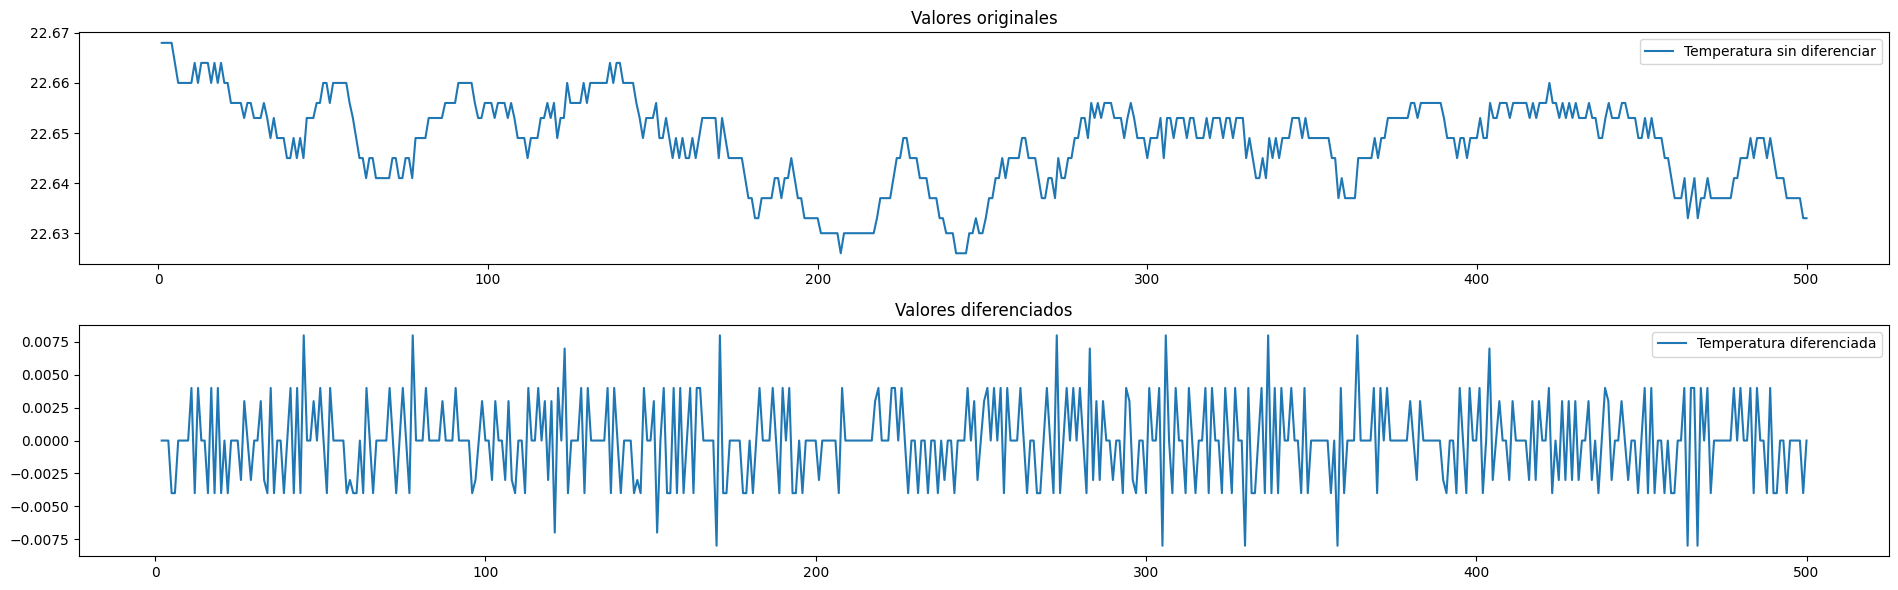

In [35]:
X = df_temp_diff['obs']
Y1 = df_temp_diff['T_b']
Y2 = df_temp_diff['1diff']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (19, 6))
ax1.plot(X, Y1, label = 'Temperatura sin diferenciar')
ax1.set_title('Valores originales')
ax1.legend()

ax2.plot(X, Y2, label = 'Temperatura diferenciada')
ax2.set_title('Valores diferenciados')
ax2.legend()

plt.tight_layout()
plt.show()

## Parte 2.1 Normalización de valores entre [-1,1]

Se tiene que hacer la siguiente adaptación:
```math
x_{\text{norm}} = \frac{x - x_{\min}}{x_{\max} - x_{\min}} \times 2 - 1
```

In [40]:
df_temp_norm['T_b_norm2'] = (df_temp_norm['T_b'] - df_temp_norm['T_b'].min())/(df_temp_norm['T_b'].max() - df_temp_norm['T_b'].min()) * 2 - 1
df_temp_norm.head()

,obs,time,T_b,T_b_norm,T_b_norm2
0,1,1746819.055,22.668,1.000000,1.000000
1,2,1746820.073,22.668,1.000000,1.000000
2,3,1746821.115,22.668,1.000000,1.000000
3,4,1746822.133,22.668,1.000000,1.000000
4,5,1746823.150,22.664,0.904762,0.809524


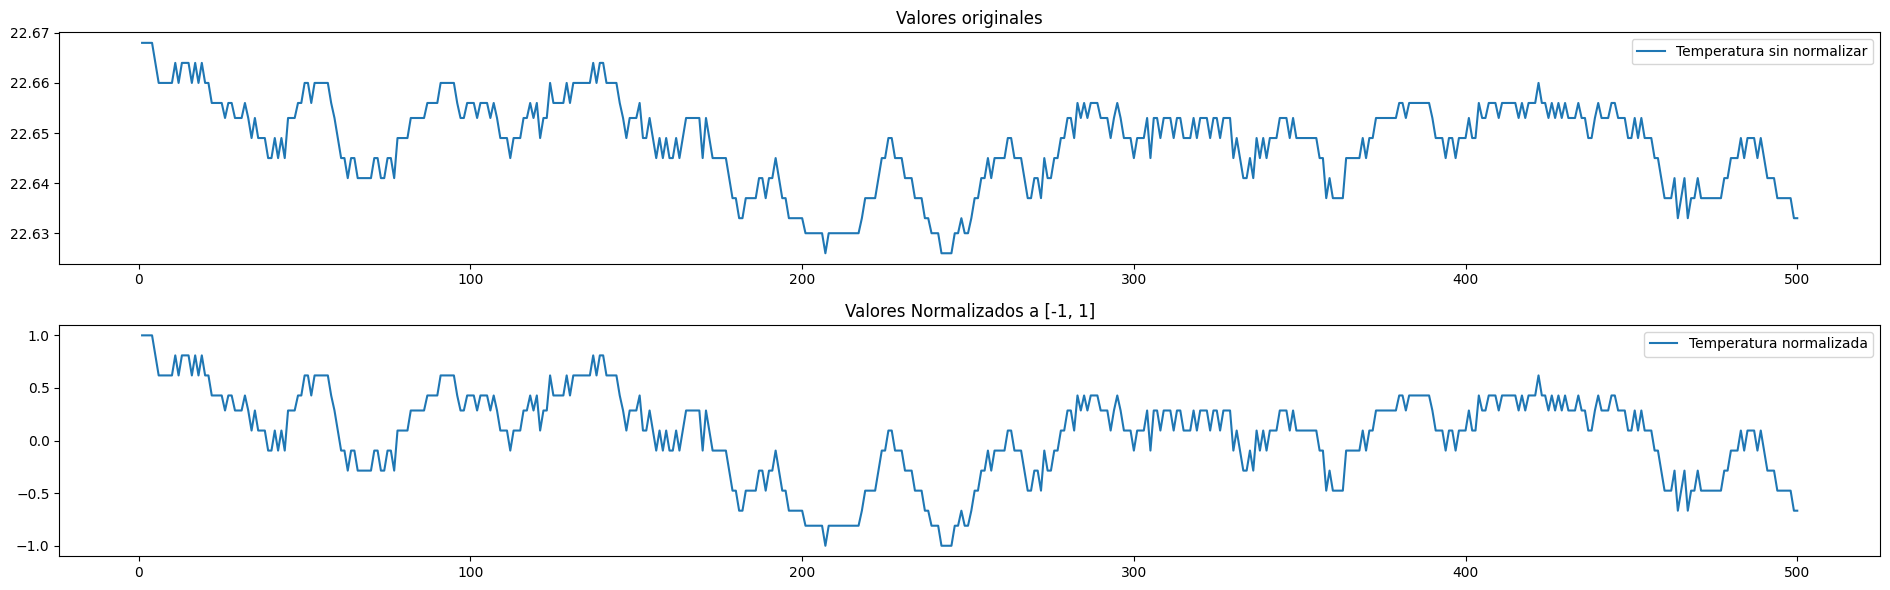

In [41]:
X = df_temp_norm['obs']
Y1 = df_temp_norm['T_b']
Y2 = df_temp_norm['T_b_norm2']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (19, 6))
ax1.plot(X, Y1, label = 'Temperatura sin normalizar')
ax1.set_title('Valores originales')
ax1.legend()

ax2.plot(X, Y2, label = 'Temperatura normalizada')
ax2.set_title('Valores Normalizados a [-1, 1]')
ax2.legend()

plt.tight_layout()
plt.show()

## Parte 2.2 Segunda diferenciación
La segunda diferenciación se define como la diferencia de la primera diferenciación:

```math
\Delta^2 x_t = \Delta x_t - \Delta x_{t-1} = (x_t - x_{t-1}) - (x_{t-1} - x_{t-2}) = x_t - 2x_{t-1} + x_{t-2}
```

In [ ]:
df_temp_diff['2diff'] = df_temp_diff['T_b'].diff(2)
df_temp_diff.head()

,obs,time,T_b,1diff,2diff
0,1,1746819.055,22.668,NaN,NaN
1,2,1746820.073,22.668,0.000,NaN
2,3,1746821.115,22.668,0.000,0.000
3,4,1746822.133,22.668,0.000,0.000
4,5,1746823.150,22.664,-0.004,-0.004


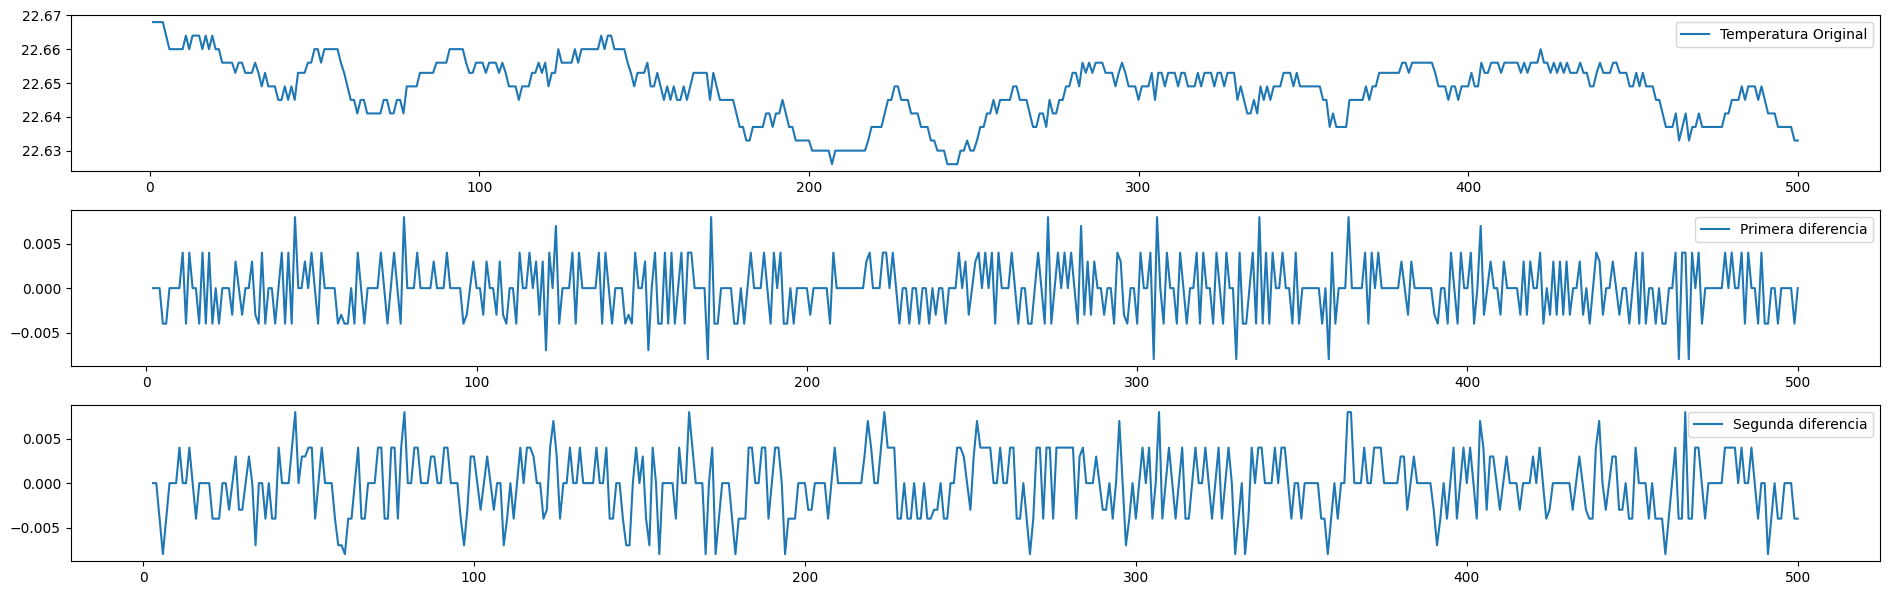

In [44]:
X = df_temp_diff['obs']
Y1 = df_temp_diff['T_b']
Y2 = df_temp_diff['1diff']
Y3 = df_temp_diff['2diff']

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (19, 6))
ax1.plot(X, Y1, label = 'Temperatura Original')
ax1.legend()

ax2.plot(X, Y2, label = 'Primera diferencia')
ax2.legend()

ax3.plot(X, Y3, label = 'Segunda diferencia')
ax3.legend()

plt.tight_layout()
plt.show()

## Parte 2.2 Tercera diferenciación

La tercera diferenciación se calcula como la diferencia de la segunda diferenciación:


```math
\Delta^3 x_t = \Delta^2 x_t - \Delta^2 x_{t-1} = 
(x_t - 2x_{t-1} + x_{t-2}) - (x_{t-1} - 2x_{t-2} + x_{t-3}) = 
x_t - 3x_{t-1} + 3x_{t-2} - x_{t-3}
```


In [45]:
df_temp_diff['3diff'] = df_temp_diff['T_b'].diff(3)
df_temp_diff.head()

,obs,time,T_b,1diff,2diff,3diff
0,1,1746819.055,22.668,NaN,NaN,NaN
1,2,1746820.073,22.668,0.000,NaN,NaN
2,3,1746821.115,22.668,0.000,0.000,NaN
3,4,1746822.133,22.668,0.000,0.000,0.000
4,5,1746823.150,22.664,-0.004,-0.004,-0.004


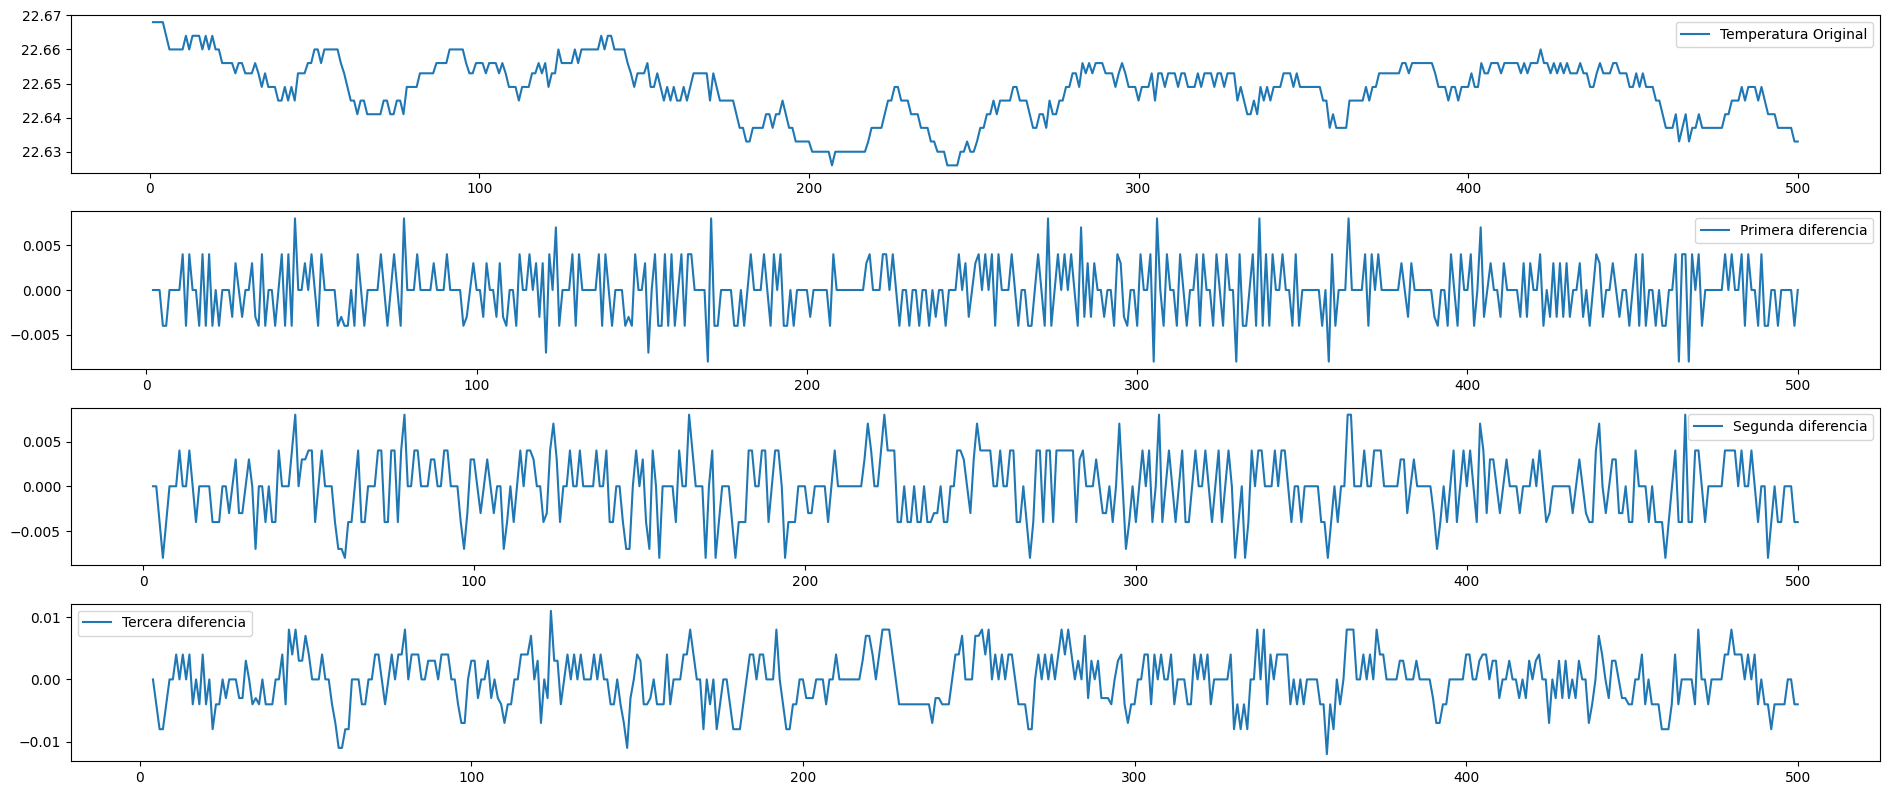

In [ ]:
X = df_temp_diff['obs']
Y1 = df_temp_diff['T_b']
Y2 = df_temp_diff['1diff']
Y3 = df_temp_diff['2diff']
Y4 = df_temp_diff['3diff']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (19, 8))
ax1.plot(X, Y1, label = 'Temperatura Original')
ax1.legend()

ax2.plot(X, Y2, label = 'Primera diferencia')
ax2.legend()

ax3.plot(X, Y3, label = 'Segunda diferencia')
ax3.legend()

ax4.plot(X, Y4, label = 'Tercera diferencia')
ax4.legend()

plt.tight_layout()
plt.show()